In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('/Users/danialnekounam/Desktop/car.csv')
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [63]:
dummies=pd.get_dummies(data,columns=['vhigh','vhigh.1','2','2.1','small','low'])
dummies

,unacc,vhigh_high,vhigh_low,vhigh_med,vhigh_vhigh,vhigh.1_high,vhigh.1_low,vhigh.1_med,vhigh.1_vhigh,2_2,...,2_5more,2.1_2,2.1_4,2.1_more,small_big,small_med,small_small,low_high,low_low,low_med
0,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
1,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
2,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
4,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,good,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1723,vgood,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1724,unacc,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1725,good,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [78]:
print ("Dataset: ",dummies.head())

Dataset:     unacc  vhigh_high  vhigh_low  vhigh_med  vhigh_vhigh  vhigh.1_high  \
0  unacc           0          0          0            1             0   
1  unacc           0          0          0            1             0   
2  unacc           0          0          0            1             0   
3  unacc           0          0          0            1             0   
4  unacc           0          0          0            1             0   

   vhigh.1_low  vhigh.1_med  vhigh.1_vhigh  2_2  ...  2_5more  2.1_2  2.1_4  \
0            0            0              1    1  ...        0      1      0   
1            0            0              1    1  ...        0      1      0   
2            0            0              1    1  ...        0      1      0   
3            0            0              1    1  ...        0      1      0   
4            0            0              1    1  ...        0      1      0   

   2.1_more  small_big  small_med  small_small  low_high  low_low  low_med  

In [79]:
X = dummies.values[:, 1:21]
Y = dummies.values[:, 0]
df = pd.DataFrame(dummies)
dummies


,unacc,vhigh_high,vhigh_low,vhigh_med,vhigh_vhigh,vhigh.1_high,vhigh.1_low,vhigh.1_med,vhigh.1_vhigh,2_2,...,2_5more,2.1_2,2.1_4,2.1_more,small_big,small_med,small_small,low_high,low_low,low_med
0,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
1,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
2,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
4,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,good,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1723,vgood,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1724,unacc,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1725,good,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
X, Y, test_size = 0.3, random_state = 100)
X_train 
X_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1]], dtype=object)

In [82]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=21)
clf_gini.fit(X_train, y_train)
clf_gini.score(X_test,y_test)

0.7957610789980732

In [83]:
clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 21)
clf_entropy.fit(X_train, y_train)
clf_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=21,
                       random_state=100)

In [86]:
y_pred = clf_entropy.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
['unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc'
 'acc' 'acc' 'acc' 'acc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'unacc' 'acc' 

In [102]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable", encoded_y, sep="\n")


Mapping of Label Encoded Classes
{'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
Label Encoded Target Variable
[2 2 2 ... 2 1 3]


In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
print("Report : ",
    classification_report(y_test, y_pred))
  

Confusion Matrix:  [[ 79   0  26   0]
 [ 22   0   0   0]
 [ 38   0 334   0]
 [ 20   0   0   0]]
Accuracy :  79.57610789980733
Report :                precision    recall  f1-score   support

         acc       0.50      0.75      0.60       105
        good       0.00      0.00      0.00        22
       unacc       0.93      0.90      0.91       372
       vgood       0.00      0.00      0.00        20

    accuracy                           0.80       519
   macro avg       0.36      0.41      0.38       519
weighted avg       0.77      0.80      0.78       519



/Users/danialnekounam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danialnekounam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danialnekounam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [104]:
from sklearn.model_selection import cross_val_score
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

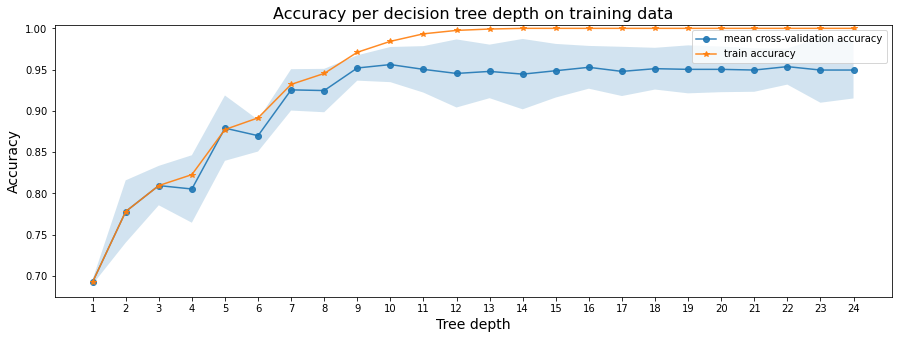

In [111]:
import matplotlib.pyplot as plt
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    ig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [112]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-10 tree achieves the best mean cross-validation accuracy 95.61298 +/- 1.0643% on training dataset


In [113]:
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 5-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)


Single tree depth:  10
Accuracy, Training Set:  98.42715 %
Accuracy, Test Set:  95.18304 %
